In [33]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB

# SNS set style
sns.set()
from IPython.core.pylabtools import figsize
figsize(20,20)

In [24]:
data = pd.read_csv('dataset/news_group20.csv')

In [25]:
data.head()

,Unnamed: 0,id,category,text
0,0,15530,sci.crypt,From: hollasch@kpc.com (Steve Hollasch)\nSubje...
1,1,15289,sci.crypt,From: amanda@intercon.com (Amanda Walker)\nSub...
2,2,15464,sci.crypt,From: metatron!joe@dogface.austin.tx.us (Joe Z...
3,3,15593,sci.crypt,From: gtoal@gtoal.com (Graham Toal)\nSubject: ...
4,4,14147,sci.crypt,From: Marc VanHeyningen <mvanheyn@cs.indiana.e...


In [26]:
data.groupby('category').describe()

Unnamed: 0                                          \
                              count     mean         std      min       25%   
category                                                                      
alt.atheism                   799.0   7063.0  230.795725   6664.0   6863.50   
comp.graphics                 973.0  17431.0  281.025206  16945.0  17188.00   
comp.os.ms-windows.misc       985.0   6171.0  284.489309   5679.0   5925.00   
comp.sys.ibm.pc.hardware      982.0   8943.5  283.623283   8453.0   8698.25   
comp.sys.mac.hardware         961.0  16464.0  277.561104  15984.0  16224.00   
comp.windows.x                980.0   5188.5  283.045933   4699.0   4943.75   
misc.forsale                  972.0  11535.5  280.736531  11050.0  11292.75   
rec.autos                     990.0   7957.5  285.932684   7463.0   7710.25   
rec.motorcycles               994.0  14505.5  287.087385  14009.0  14257.25   
rec.sport.baseball            994.0   2486.5  287.087385   1990.0   2238.25   
rec.sport.hockey              999.0   1490.0  288.530761    991.0   1240.50   
sci.crypt                     991.0    495.0  286.221360      0.0    247.50   
sci.electronics               981.0  15493.0  283.334608  15003.0  15248.00   
sci.med                       990.0  12516.5  285.932684  12022.0  12269.25   
sci.space                     987.0  10556.0  285.066659  10063.0  10309.50   
soc.religion.christian        997.0  13510.0  287.953411  13012.0  13261.00   
talk.politics.guns            910.0  18372.5  262.838670  17918.0  18145.25   
talk.politics.mideast         940.0   3453.5  271.498926   2984.0   3218.75   
talk.politics.misc            775.0   4311.0  223.867520   3924.0   4117.50   
talk.religion.misc            628.0   9748.5  181.432265   9435.0   9591.75   

                                                         id                 \
                              50%       75%      max  count           mean   
category                                                                     
alt.atheism                7063.0   7262.50   7462.0  799.0   52979.694618   
comp.graphics             17431.0  17674.00  17917.0  973.0   38689.790339   
comp.os.ms-windows.misc    6171.0   6417.00   6663.0  985.0    9992.792893   
comp.sys.ibm.pc.hardware   8943.5   9188.75   9434.0  982.0   60527.035642   
comp.sys.mac.hardware     16464.0  16704.00  16944.0  961.0   51735.750260   
comp.windows.x             5188.5   5433.25   5678.0  980.0   67366.196939   
misc.forsale              11535.5  11778.25  12021.0  972.0   76143.984568   
rec.autos                  7957.5   8204.75   8452.0  990.0  103004.122222   
rec.motorcycles           14505.5  14753.75  15002.0  994.0  104500.885312   
rec.sport.baseball         2486.5   2734.75   2983.0  994.0  104388.685111   
rec.sport.hockey           1490.0   1739.50   1989.0  999.0   53847.394394   
sci.crypt                   495.0    742.50    990.0  991.0   15643.839556   
sci.electronics           15493.0  15738.00  15983.0  981.0   53808.360856   
sci.med                   12516.5  12763.75  13011.0  990.0   59070.926263   
sci.space                 10556.0  10802.50  11049.0  987.0   61147.556231   
soc.religion.christian    13510.0  13759.00  14008.0  997.0   21144.667001   
talk.politics.guns        18372.5  18599.75  18827.0  910.0   54520.029670   
talk.politics.mideast      3453.5   3688.25   3923.0  940.0   76484.397872   
talk.politics.misc         4311.0   4504.50   4698.0  775.0  178291.276129   
talk.religion.misc         9748.5   9905.25  10062.0  628.0   83918.148089   

                                                                      \
                                  std       min        25%       50%   
category                                                               
alt.atheism               1046.890387   49960.0   53060.50   53327.0   
comp.graphics              397.911540   37261.0   38414.00   38664.0   
comp.os.ms-windows.misc    460.658716    8514.0    9

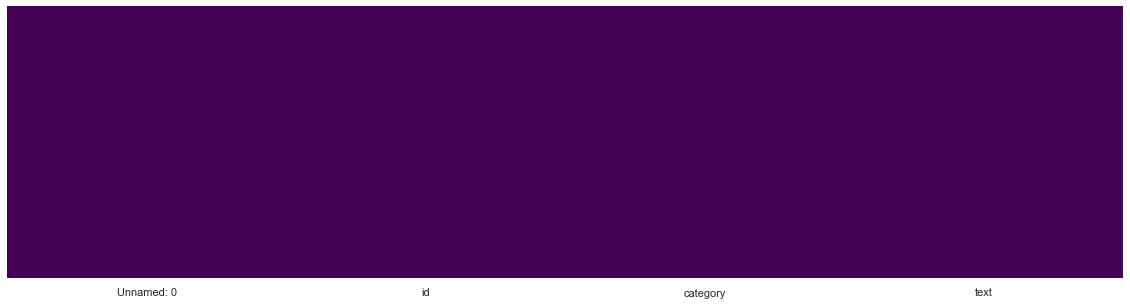

In [30]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

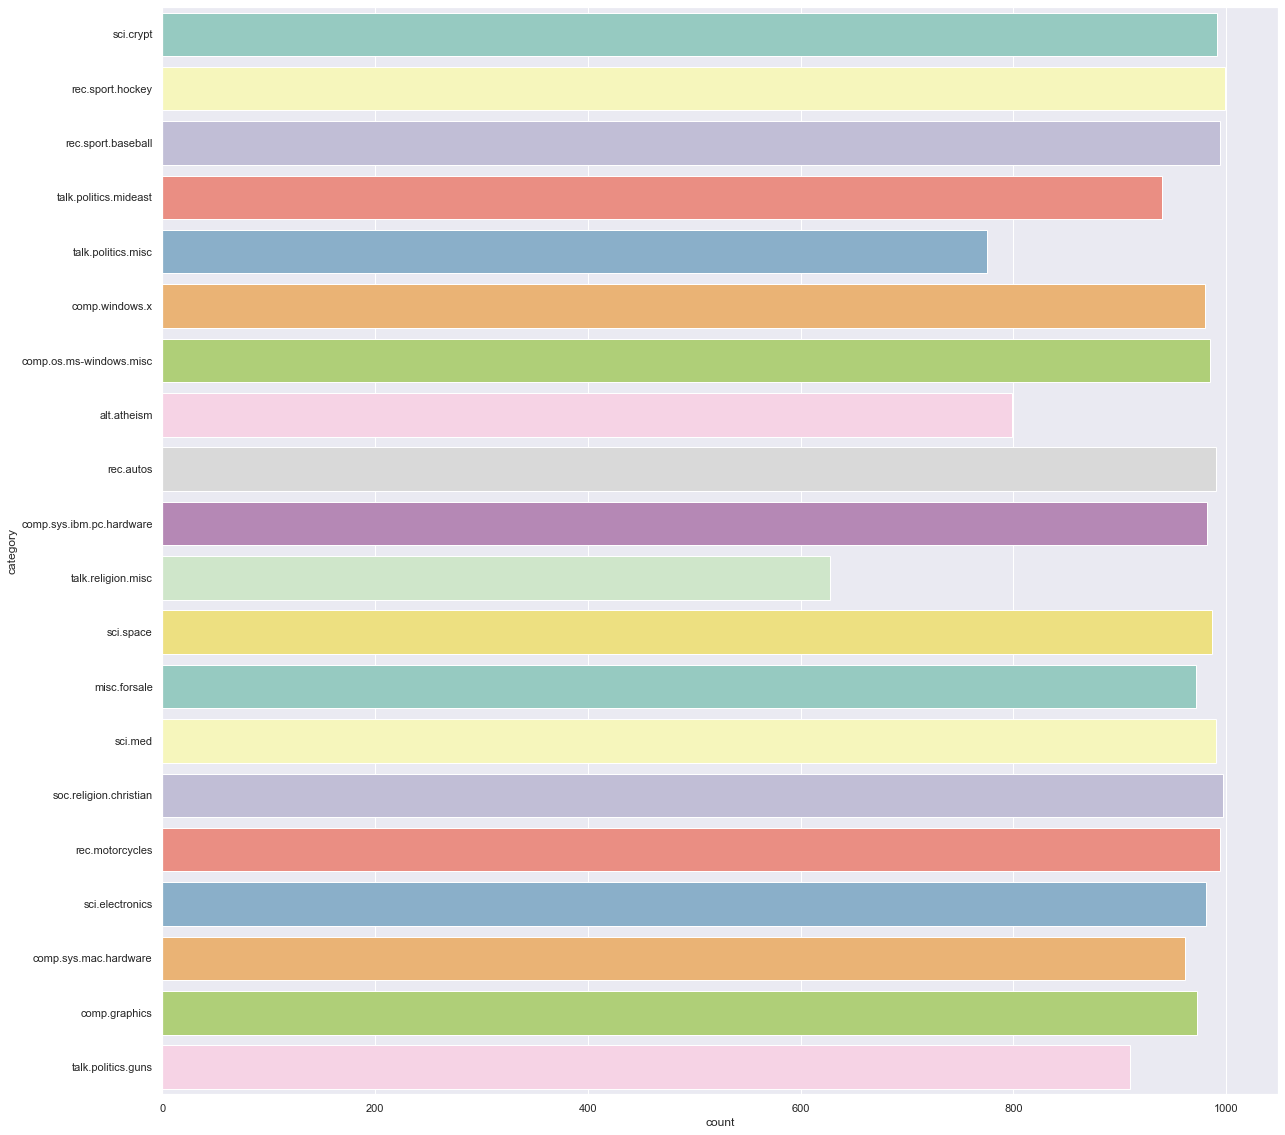

In [34]:
sns.countplot(y="category", data=data, palette="Set3")

In [35]:
import string

In [36]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [38]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(data['text'], data['category'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

15062 3766 18828


In [39]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(msg_train,label_train)

In [21]:
predictions = pipeline.predict(msg_test)

In [22]:
print(classification_report(predictions,label_test))

               precision    recall  f1-score   support

     business       0.96      0.94      0.95       101
entertainment       0.93      1.00      0.96        75
     politics       0.98      0.93      0.95        86
        sport       1.00      0.99      0.99        94
         tech       0.97      0.98      0.97        89

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

